# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto_assets = {
    "assets" : [1.2, 5.3]
}

symbols = ["my_btc", "my_eth"]

crypto_assets_df = pd.DataFrame(crypto_assets, symbols)
crypto_assets_df

,assets
my_btc,1.2
my_eth,5.3


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response_data = requests.get(btc_url)

import json
btc_data = btc_response_data.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
                                    
# Fetch current ETH price
# YOUR CODE HERE!
eth_response_data = requests.get(eth_url)
eth_data = eth_response_data.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * crypto_assets_df.loc["my_btc"]["assets"]
my_eth_value = eth_price * crypto_assets_df.loc["my_eth"]["assets"]
value_data = {
    "my_btc_value" : [my_btc_value],
    "my_eth_value" : [my_eth_value] 
}

# Print current crypto wallet balance
print(f"The current value of your BTC is ${my_btc_value:0.2f}")
print(f"The current value of your ETH is ${my_eth_value:0.2f}")

The current value of your BTC is $27536.40
The current value of your ETH is $8415.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-01-24", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(tickers, timeframe, start=today, end=today).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio



AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-24 05:00:00+00:00  99.84  100.32  99.68  100.28  6539095       20248   

                                          SPY                         \
                                 vwap    open    high     low  close   
timestamp                                                              
2023-01-24 05:00:00+00:00  100.146289  398.88  401.15  397.64  400.2   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-24 05:00:00+00:00  59549719      434698  399.936054

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $100.28
Current SPY closing price: $400.2


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_price * my_spy
my_agg_value = agg_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20010.00
The current value of your 200 AGG shares is $20056.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
stocks_value = my_spy_value + my_agg_value
# Create savings DataFrame
# YOUR CODE HERE!
savings = {
    "amount" : [crypto_value, stocks_value]
}

symbols = ["crypto", "shares"]

df_savings = pd.DataFrame(savings, symbols)
# Display savings DataFrame

display(df_savings)

,amount
crypto,35951.74
shares,40066.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

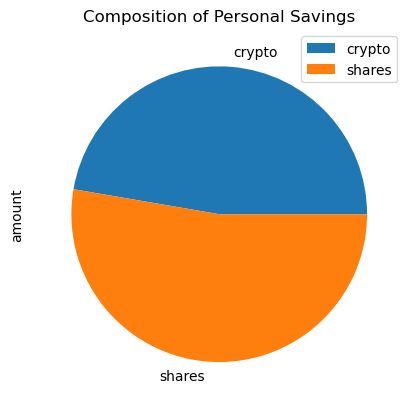

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + stocks_value
difference = emergency_fund - total_savings
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations!  Your total savings is enough to cover your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have exactly enough savings to cover your emergency fund!")
elif total_savings < emergency_fund:
    print(f"You are {difference} way from reaching your emergency goal fund. Keep going!")

Congratulations!  Your total savings is enough to cover your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(portfolio_data = df_stock_data, weights = [.50, .50], num_simulation=1000, num_trading_days=252 * 30)

In [28]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaelhobbs/Dropbox/My Mac (Michael’s MacBook Pro)/Desktop/class_materials_edits/NU-VIRT-FIN-PT-12-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999960,1.000215,0.997836,0.992964,0.988737,0.992457,0.988757,1.006788,1.001212,0.993361,...,1.003043,0.993301,1.007517,0.990931,1.005583,0.997809,0.997587,1.007897,0.991363,1.005159
2,0.995643,0.998922,1.002035,0.988838,1.005431,0.989664,0.990103,1.001225,0.999333,0.998909,...,0.999175,0.987207,1.010648,0.992918,0.993163,0.994995,1.001078,1.002393,0.993575,1.008737
3,0.994651,0.987421,1.002517,0.984301,1.000007,0.997092,0.991597,1.008565,0.997400,0.987454,...,0.992412,0.978573,1.012678,0.987223,0.993224,1.002181,1.006815,0.994599,0.998174,1.006770
4,0.987752,0.987694,1.015418,0.983905,1.000982,0.990525,0.994346,1.004905,0.991508,0.994310,...,0.999484,0.974010,1.007980,0.999523,0.994602,1.004736,1.005679,0.996816,0.992144,1.006193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.204612,4.014574,9.876351,31.149024,15.268474,7.987145,11.527625,8.909182,5.726567,9.649023,...,3.774578,7.005780,10.103555,17.203047,9.040041,11.379245,9.005327,14.532325,9.907768,19.178891
7557,10.309589,3.992326,9.915646,31.243625,15.259519,7.939344,11.512762,8.869637,5.746533,9.556892,...,3.756226,7.035152,10.175249,17.103475,9.082149,11.302351,8.990862,14.547388,9.894361,19.094383
7558,10.347340,4.013095,9.962958,31.500608,15.277337,7.958651,11.586137,8.915344,5.725588,9.484682,...,3.748269,7.010837,10.232118,16.992308,9.123539,11.304415,9.128245,14.557743,9.870728,19.040924
7559,10.434703,4.033161,9.877771,31.404505,15.291988,7.964221,11.415396,8.992770,5.717768,9.509942,...,3.771064,7.035764,10.263978,17.089654,9.162897,11.303275,9.187616,14.618980,9.895241,18.873118


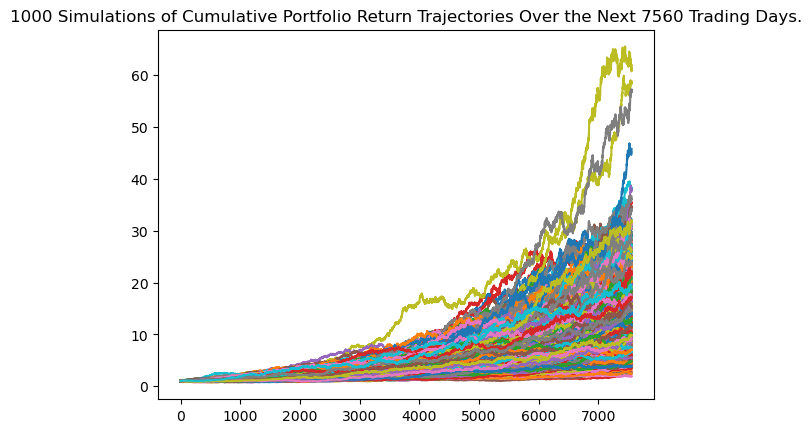

In [30]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_year.plot_simulation()

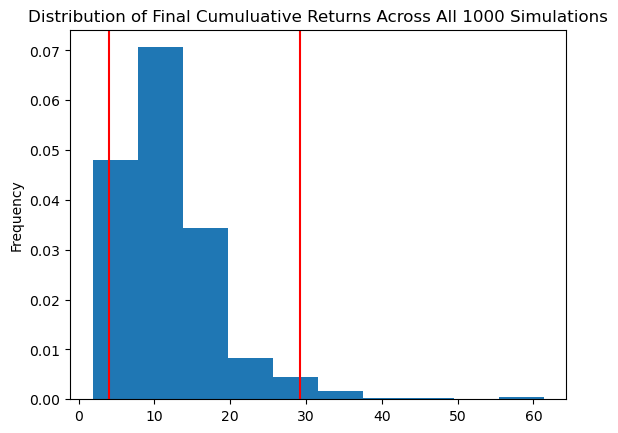

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean              11.890177
std                6.612171
min                1.876352
25%                7.373175
50%               10.362348
75%               14.697972
max               61.352607
95% CI Lower       4.024234
95% CI Upper      29.234404
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80484.68 and $584688.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120727.02 and $877032.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year = MCSimulation(portfolio_data = df_stock_data, weights = [.50, .50], num_simulation=1000, num_trading_days=252 * 5)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaelhobbs/Dropbox/My Mac (Michael’s MacBook Pro)/Desktop/class_materials_edits/NU-VIRT-FIN-PT-12-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007165,0.994990,0.990465,1.004854,1.000035,0.997000,0.999819,1.000548,0.992360,0.995405,...,0.997911,0.993339,0.993711,1.001598,0.996835,1.008889,1.006360,0.997086,0.995737,0.995130
2,1.002427,0.995388,0.993424,1.011631,1.006185,0.992519,0.998153,1.003798,0.991837,0.981404,...,1.005490,0.989531,0.986891,1.003865,0.995093,1.006430,1.012195,0.998532,1.001360,0.992793
3,1.001319,0.990062,0.992960,1.018284,1.005447,0.984784,1.001663,1.009947,0.992498,0.982419,...,1.007224,0.991955,0.989907,1.009556,0.997566,1.003052,1.018493,0.992879,1.001416,0.996733
4,1.006491,0.983191,0.985940,1.023111,1.005318,0.975132,1.004323,1.024036,0.990306,0.984816,...,1.014255,0.991246,0.985330,1.011442,0.998034,1.005060,1.027239,0.993159,0.994365,1.001953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.747039,0.986913,1.209370,1.697598,1.605698,1.198927,1.377815,1.252567,1.806989,1.505159,...,1.615961,2.339489,1.444772,1.368738,1.488497,1.327954,1.735138,1.388544,1.530321,1.559293
1257,1.734065,0.986856,1.212590,1.691285,1.604961,1.199376,1.385667,1.254354,1.792421,1.493785,...,1.604714,2.339304,1.444211,1.385475,1.481419,1.338580,1.754780,1.398330,1.519697,1.554803
1258,1.720626,0.977655,1.203251,1.686702,1.595557,1.205500,1.384578,1.243038,1.787964,1.503675,...,1.605683,2.332175,1.450570,1.388749,1.483413,1.337823,1.749241,1.392382,1.527551,1.554229
1259,1.720179,0.979349,1.217786,1.699748,1.589486,1.206059,1.397610,1.235851,1.795512,1.504154,...,1.619976,2.338230,1.450287,1.394663,1.477404,1.350314,1.763875,1.395370,1.537529,1.550113


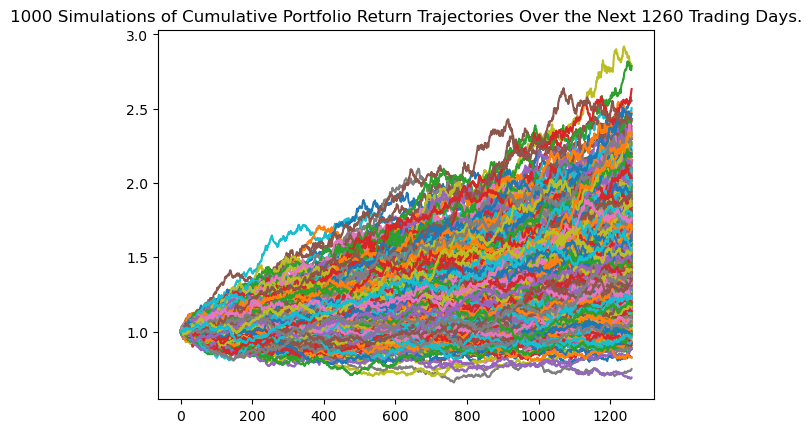

In [40]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_year.plot_simulation()

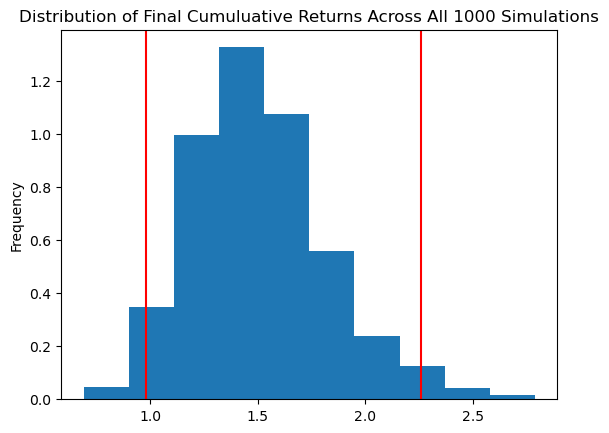

In [41]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean               1.503432
std                0.317195
min                0.690547
25%                1.276194
50%                1.471093
75%                1.686898
max                2.787909
95% CI Lower       0.980430
95% CI Upper       2.256057
Name: 1260, dtype: float64


In [43]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8] * initial_investment)
ci_upper_five = round(tbl[9] * initial_investment)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19609 and $45121


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(portfolio_data = df_stock_data, weights = [.50, .50], num_simulation=1000, num_trading_days=252 * 10)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaelhobbs/Dropbox/My Mac (Michael’s MacBook Pro)/Desktop/class_materials_edits/NU-VIRT-FIN-PT-12-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006903,1.014876,0.992485,1.000426,1.010854,0.992341,0.994980,0.994996,1.004930,1.003952,...,0.994995,0.995741,0.996469,1.003527,0.996872,0.992922,0.994098,1.000183,1.010029,1.007926
2,1.004510,1.008627,0.990667,1.005974,1.017105,1.000631,0.990290,1.006556,0.996577,1.000635,...,0.994529,0.995250,0.983674,1.011387,0.999600,1.003299,0.992546,1.004578,1.009124,1.004918
3,0.995312,1.020660,0.995717,1.014688,1.006757,1.005015,0.993505,1.001200,0.991284,0.987441,...,0.997308,0.984282,0.982488,1.018325,1.004473,0.999313,0.992417,1.002807,1.010344,0.995773
4,0.992847,1.020623,0.996901,1.020532,1.012859,1.008995,0.990688,1.001960,0.986290,0.993797,...,1.011008,0.979954,0.993476,1.018048,1.003667,0.995033,1.001995,1.007508,1.009252,0.992723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.666259,2.555772,1.258688,2.306130,1.377098,1.920316,1.127423,2.444194,1.735695,1.574364,...,1.843248,2.323507,1.524195,1.753804,2.981610,1.598241,2.212276,2.887781,2.078591,2.232443
2517,2.666978,2.551755,1.254778,2.310276,1.384533,1.934686,1.121998,2.431503,1.721469,1.566293,...,1.834543,2.323104,1.532572,1.755933,2.996767,1.608868,2.212307,2.882686,2.082876,2.271402
2518,2.679836,2.555612,1.247670,2.302415,1.374069,1.924819,1.118852,2.448561,1.730269,1.562951,...,1.821521,2.326850,1.533893,1.750142,2.974043,1.602111,2.220690,2.895957,2.098988,2.263079
2519,2.662186,2.572877,1.242658,2.318923,1.383818,1.919675,1.125497,2.469722,1.725143,1.564864,...,1.822920,2.322103,1.544262,1.746435,2.981894,1.603337,2.219871,2.907022,2.078338,2.245975


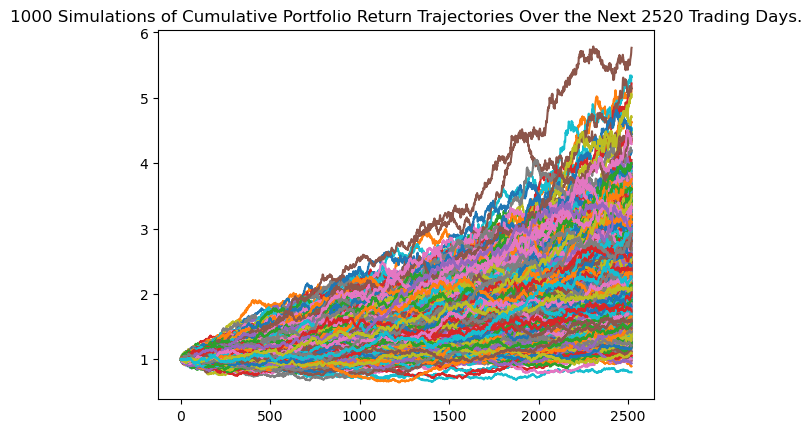

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_year.plot_simulation()

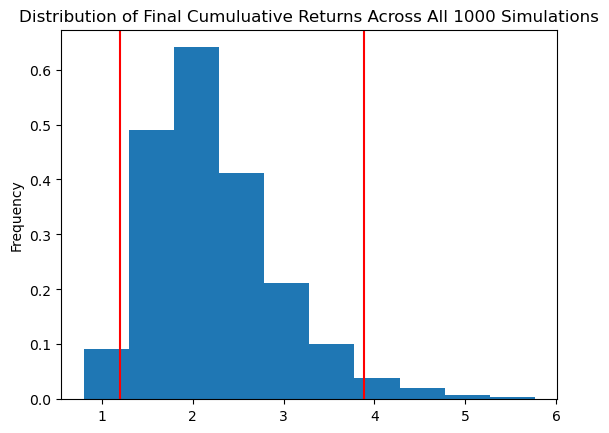

In [48]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean               2.241178
std                0.711204
min                0.801638
25%                1.735798
50%                2.137565
75%                2.596315
max                5.765476
95% CI Lower       1.198285
95% CI Upper       3.888404
Name: 2520, dtype: float64


In [51]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8] * initial_investment)
ci_upper_ten = round(tbl[9] * initial_investment)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23966 and $77768
